# COSC 3337 - HW5 - Ujwal Joshi
## Option 3 - Clusters

### Dataset & Task
Following is the Data Dictionary for Credit Card dataset :-

- `CUST_ID` : Identification of Credit Card holder (Categorical)
- `BALANCE` : Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` : Amount of purchases made from account
- `ONEOFF_PURCHASES` : Maximum purchase amount done in one-go
- `INSTALLMENTS_PURCHASES` : Amount of purchase done in installment
- `CASH_ADVANCE` : Cash in advance given by the user
- `PURCHASES_FREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid
- `CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced"
- `PURCHASES_TRX` : Numbe of purchase transactions made
- `CREDIT_LIMIT` : Limit of Credit Card for user
- `PAYMENTS` : Amount of Payment done by user
- `MINIMUM_PAYMENTS` : Minimum amount of payments made by user
- `PRCFULLPAYMENT` : Percent of full payment paid by user
- `TENURE` : Tenure of credit card service for user
  
Using the dataset of Bank Customers create `K_Means`, `Hierarchical`, and `DBScan` clusters. Train the models with the dataset. Choose the best cluster numbers for all three models, compare the performance for all three models. Briefly discuss the pros and cons for these three models and the results.

### Dataset & Preliminary Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_cards_df = pd.read_csv("CC GENERAL.csv")
credit_cards_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
credit_cards_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
credit_cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_cards_df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
unique_vals_credit_cards_df = pd.DataFrame({
    'Unique Value Count': credit_cards_df.apply(lambda col: len(col.unique())),
    'Unique Values': credit_cards_df.apply(lambda col: col.unique())
})

unique_vals_credit_cards_df

,Unique Value Count,Unique Values
CUST_ID,8950,"[C10001, C10002, C10003, C10004, C10005, C1000..."
BALANCE,8871,"[40.900749, 3202.467416, 2495.148862, 1666.670..."
BALANCE_FREQUENCY,43,"[0.818182, 0.909091, 1.0, 0.636364, 0.545455, ..."
PURCHASES,6203,"[95.4, 0.0, 773.17, 1499.0, 16.0, 1333.28, 709..."
ONEOFF_PURCHASES,4014,"[0.0, 773.17, 1499.0, 16.0, 6402.63, 661.49, 1..."
INSTALLMENTS_PURCHASES,4452,"[95.4, 0.0, 1333.28, 688.38, 436.2, 200.0, 920..."
CASH_ADVANCE,4323,"[0.0, 6442.945483, 205.788017, 346.81139, 2301..."
PURCHASES_FREQUENCY,47,"[0.166667, 0.0, 1.0, 0.083333, 0.666667, 0.333..."
ONEOFF_PURCHASES_FREQUENCY,47,"[0.0, 1.0, 0.083333, 0.166667, 0.25, 0.916667,..."
PURCHASES_INSTALLMENTS_FREQUENCY,47,"[0.083333, 0.0, 0.583333, 1.0, 0.25, 0.916667,..."


### Handling Empty Values

In [7]:
na_counts = credit_cards_df.isna().sum()
na_counts[na_counts > 0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

dropping the row with the single empty credit limit value

In [8]:
credit_cards_df = credit_cards_df.dropna(subset=['CREDIT_LIMIT'])
credit_cards_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8636.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2372.566350,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,169.163545,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,825.496463,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Handling `MINIMUM_PAYMENTS` Empty Values

In [9]:
na_counts = credit_cards_df.isna().sum()
na_counts[na_counts > 0]

MINIMUM_PAYMENTS    313
dtype: int64

In [10]:
credit_cards_df['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

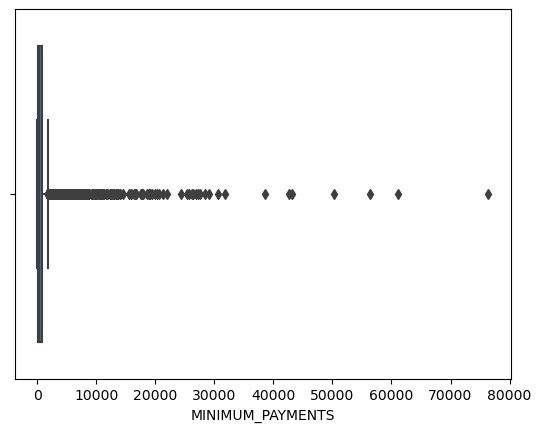

In [11]:
sns.boxplot(x=credit_cards_df['MINIMUM_PAYMENTS'])
plt.show()

Missing values will be imputed with median to keep the feature robust to outliers and preserve the overall distribution of the data

In [12]:
min_payments_median = credit_cards_df['MINIMUM_PAYMENTS'].median()
credit_cards_df['MINIMUM_PAYMENTS'] = credit_cards_df['MINIMUM_PAYMENTS'].fillna(min_payments_median)
credit_cards_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
credit_cards_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Investigation, Correlation & Feature Selection

##### `CUST_ID`

Dropping customer ID as it only represents each unique customer and not some data that can be clustered together and analyzed

In [14]:
new_credit_cards_df = credit_cards_df.copy()
new_credit_cards_df.drop(columns=['CUST_ID'], axis=1, inplace=True)
new_credit_cards_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

##### Correlation

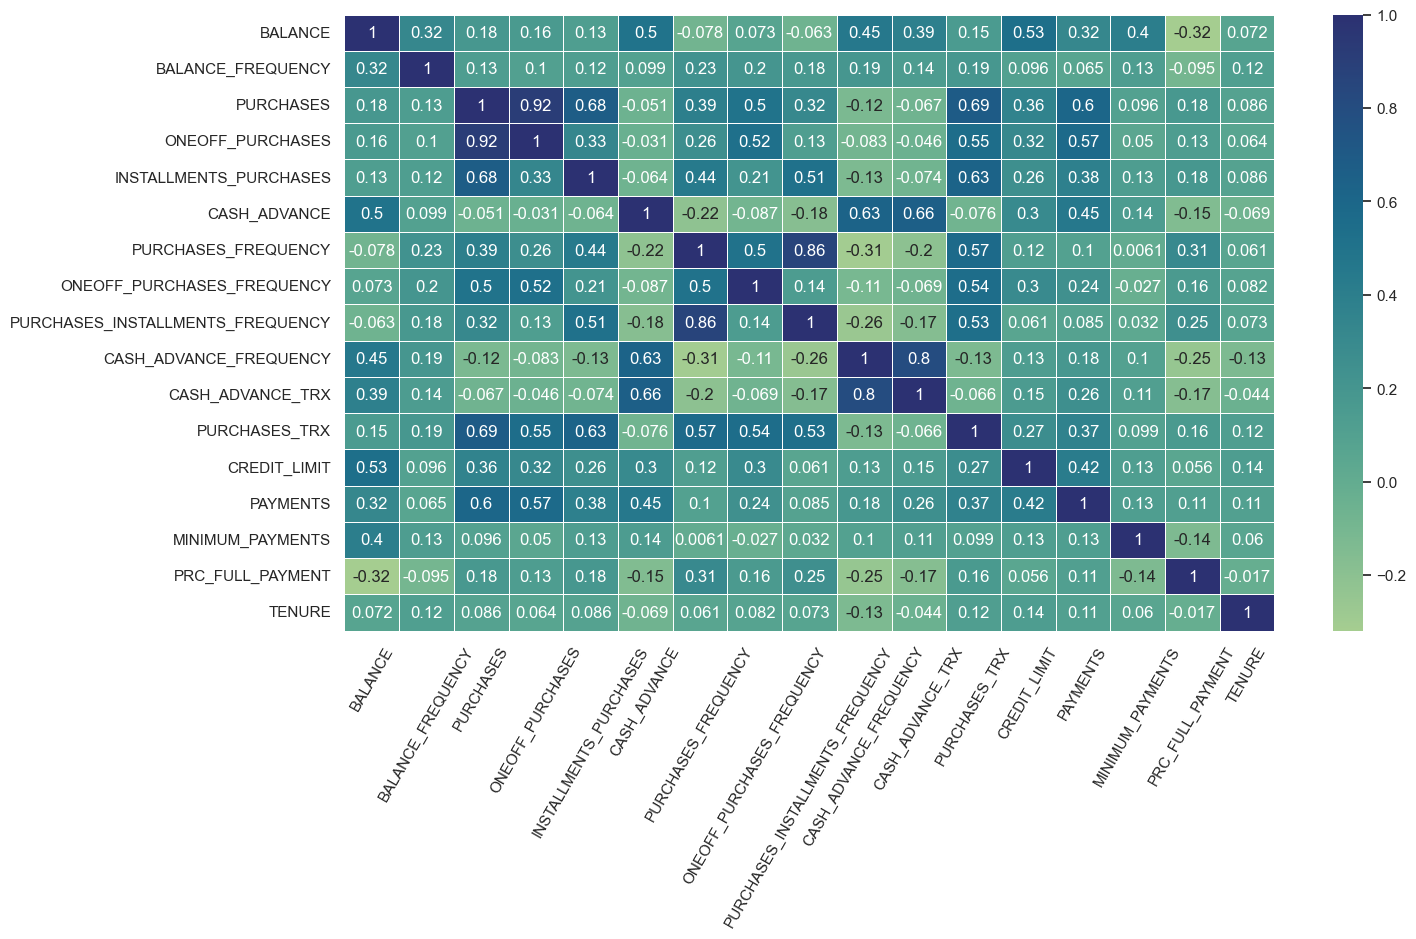

In [34]:
plt.figure(figsize=(15, 8))
sns.heatmap(new_credit_cards_df.corr(), annot=True, linewidth=.5, cmap='crest')
plt.xticks(rotation=60)
plt.show()

In [54]:
corr_df = new_credit_cards_df.corr()
corr_df[(corr_df > 0.7) & (corr_df < 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
PURCHASES,NaN,0.916844,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES,0.916844,NaN,NaN,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,NaN,0.862921,NaN,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN,0.862921,NaN,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,0.799573
CASH_ADVANCE_TRX,NaN,NaN,NaN,NaN,0.799573,NaN


Features that exhibit strong correlation: (`PURCHASES` and `ONEOFF_PURCHASES`), (`PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`), and (`CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`)

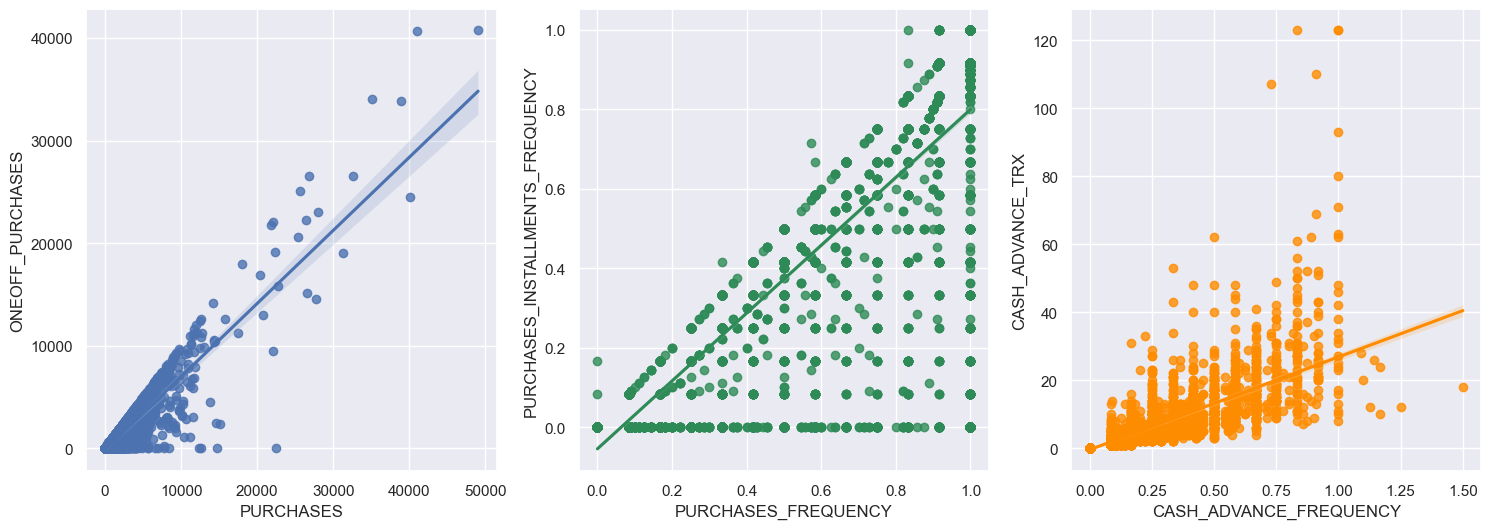

In [107]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

sns.regplot(new_credit_cards_df, x='PURCHASES', y='ONEOFF_PURCHASES', ax=axes[0])
sns.regplot(new_credit_cards_df, x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', ax=axes[1], color='seagreen')
sns.regplot(new_credit_cards_df, x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', ax=axes[2], color='darkorange')

plt.show()

##### Distribution of the features

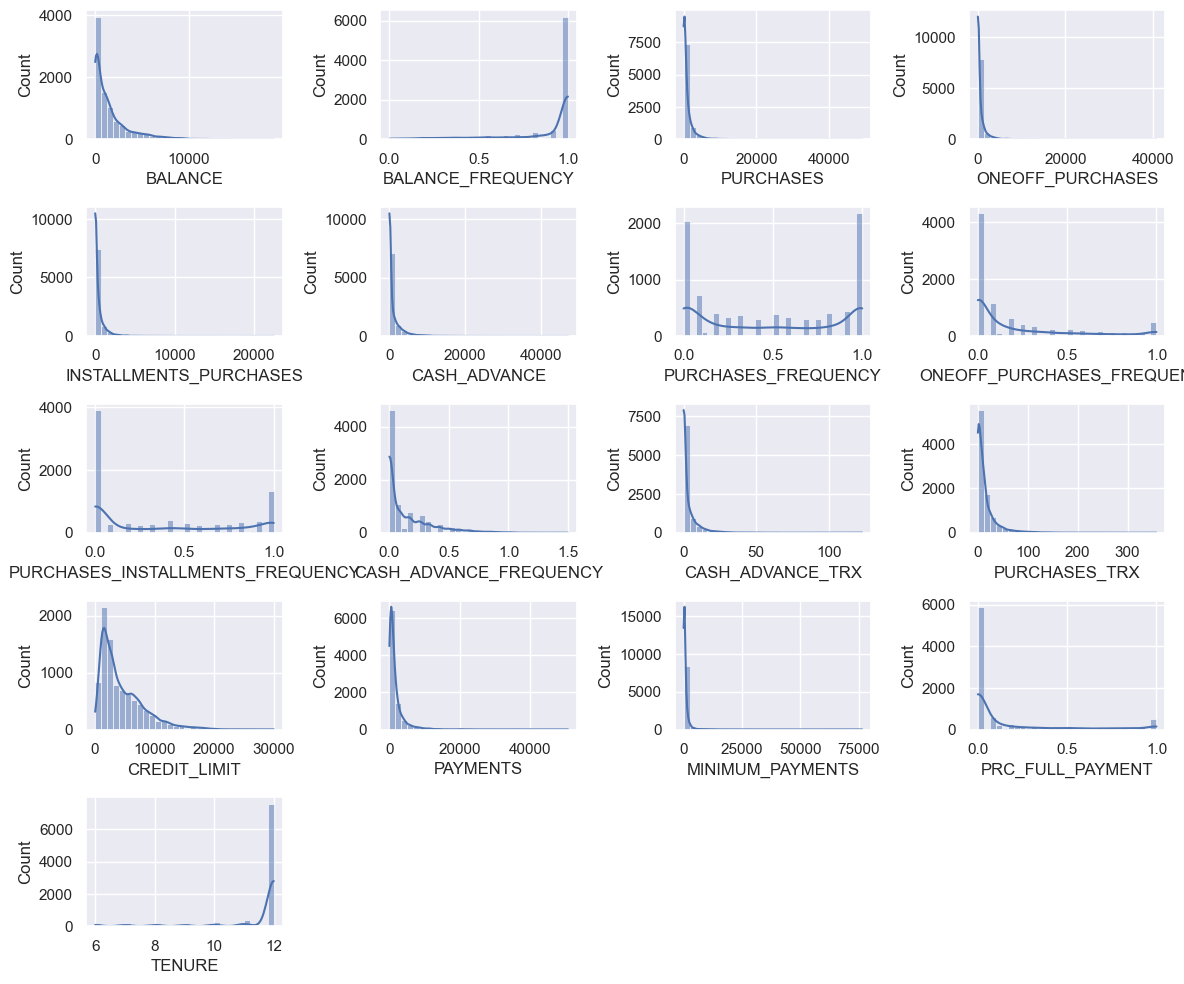

In [98]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 10))
fig.delaxes(axes[4, 1])
fig.delaxes(axes[4, 2])
fig.delaxes(axes[4, 3])

for i, col in enumerate(new_credit_cards_df.columns):
    row = i//4
    col_num = i - (4 * row)

    sns.histplot(new_credit_cards_df, x=col, bins=30, kde=True, ax=axes[row, col_num])

fig.tight_layout()
plt.show()

Most of the data is right skewed; fewer instances of higher values for the features

##### Dropping Highly Correlated Features

In [109]:
new_credit_cards_df.drop(columns=['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'], inplace=True)

In [110]:
print(new_credit_cards_df.shape)
new_credit_cards_df.head()

(8949, 14)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0,1,1200.0,678.334763,244.791237,0.000000,12


### Standardizing Data

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_credit_cards = scaler.fit_transform(new_credit_cards_df)

In [112]:
scaled_credit_cards

array([[-0.73205404, -0.24988139, -0.4249337 , ..., -0.30242676,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , ...,  0.0974534 ,
         0.2341587 ,  0.36054128],
       [ 0.44704093,  0.51798018, -0.10771601, ..., -0.09333029,
        -0.52558844,  0.36054128],
       ...,
       [-0.74046257, -0.18589504, -0.40200016, ..., -0.32690037,
         0.32912795, -4.12691899],
       [-0.74523857, -0.18589504, -0.4695839 , ..., -0.33832999,
         0.32912795, -4.12691899],
       [-0.57264377, -0.88976603,  0.0420915 , ..., -0.3243838 ,
        -0.52558844, -4.12691899]])

### K Means

Using elbow method to find optimal value for k

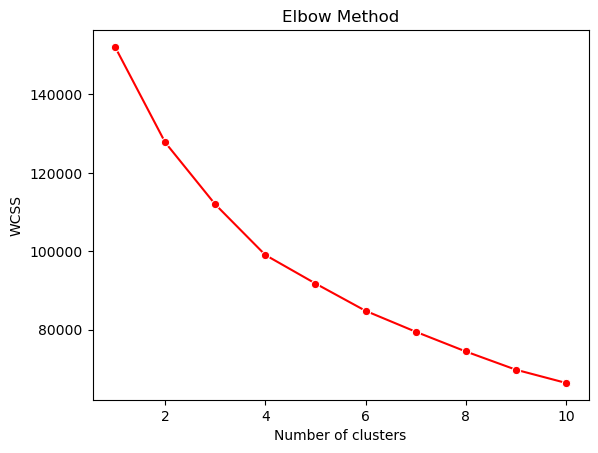

In [63]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
max_cluster_option = 11

wcss = []
for i in range(1, max_cluster_option):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_credit_cards)
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, max_cluster_option), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

warnings.resetwarnings()

using value of k=3

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_credit_cards)

c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [67]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=new_credit_cards_df.columns)
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2231.096018,0.981462,4271.831475,2719.695762,1552.621937,461.334415,0.949052,0.668302,0.744580,0.063402,1.537277,56.533225,7736.993517,4156.273031,1223.888332,0.297969,11.923015
1,799.726101,0.835240,505.976160,253.311922,252.984984,330.740983,0.465322,0.132421,0.345375,0.068235,1.209477,8.659804,3273.263658,909.888981,523.188072,0.155907,11.480719
2,3984.034534,0.958377,382.864652,248.238834,134.703354,3866.638319,0.231809,0.110908,0.143706,0.447360,12.399373,5.575549,6671.476204,3018.349187,1786.674513,0.033796,11.347335


In [88]:
cluster_labels = kmeans.labels_
cluster_profiles = pd.DataFrame(scaler.inverse_transform(scaled_credit_cards), columns=new_credit_cards_df.columns)
cluster_profiles['Cluster'] = cluster_labels
print("\nCluster Profiles:")
cluster_profiles.groupby('Cluster').mean()


Cluster Profiles:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1220.517706,0.298632,11.923077
1,799.878382,0.835186,505.615025,253.161504,252.774371,330.841416,0.465148,0.132355,0.345201,0.068243,1.209709,8.655280,3271.555016,909.824303,523.301377,0.155775,11.480549
2,3989.142419,0.958403,384.528277,248.718133,135.887632,3866.210340,0.232290,0.110942,0.144242,0.447393,12.397870,5.612155,6675.441445,3019.108570,1787.617709,0.033774,11.347744


In [89]:
profile_ranges = cluster_profiles.groupby('Cluster').agg(['min', 'max']).to_dict()

prev = None
for key in profile_ranges:
    print(key, ':', profile_ranges[key])
    if prev and key[0] == prev:
        print()

    prev = key[0]

('BALANCE', 'min') : {0: 12.423203000000058, 1: 0.0, 2: 4.382924000000003}
('BALANCE', 'max') : {0: 19043.13856, 1: 5941.271179, 2: 16304.88925}

('BALANCE_FREQUENCY', 'min') : {0: 0.09090900000000002, 1: 0.0, 2: 0.18181800000000004}
('BALANCE_FREQUENCY', 'max') : {0: 1.0, 1: 1.0, 2: 1.0}

('PURCHASES', 'min') : {0: 498.17, 1: 0.0, 2: 0.0}
('PURCHASES', 'max') : {0: 49039.57, 1: 5080.85, 2: 7194.53}

('ONEOFF_PURCHASES', 'min') : {0: 0.0, 1: 0.0, 2: 0.0}
('ONEOFF_PURCHASES', 'max') : {0: 40761.25, 1: 4900.0, 2: 6678.26}

('INSTALLMENTS_PURCHASES', 'min') : {0: 0.0, 1: 0.0, 2: 0.0}
('INSTALLMENTS_PURCHASES', 'max') : {0: 22500.0, 1: 3200.0, 2: 3887.0}

('CASH_ADVANCE', 'min') : {0: 0.0, 1: 0.0, 2: 0.0}
('CASH_ADVANCE', 'max') : {0: 19513.474829999996, 1: 7894.578816, 2: 47137.21176}

('PURCHASES_FREQUENCY', 'min') : {0: 0.08333299999999999, 1: 0.0, 2: 0.0}
('PURCHASES_FREQUENCY', 'max') : {0: 1.0, 1: 1.0, 2: 1.0}

('ONEOFF_PURCHASES_FREQUENCY', 'min') : {0: 0.0, 1: 0.0, 2: 0.0}
('ONEOFF

Silhouette Score

In [90]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

silhouette_score_kmeans = silhouette_score(scaled_credit_cards, KMeans(n_clusters = 3, random_state = 42).fit_predict(scaled_credit_cards))
print(silhouette_score_kmeans)

warnings.resetwarnings()

0.25060934476277197


### Hierarchical Clustering

Determining optimal number of clusters using dendrogram and silhouette score

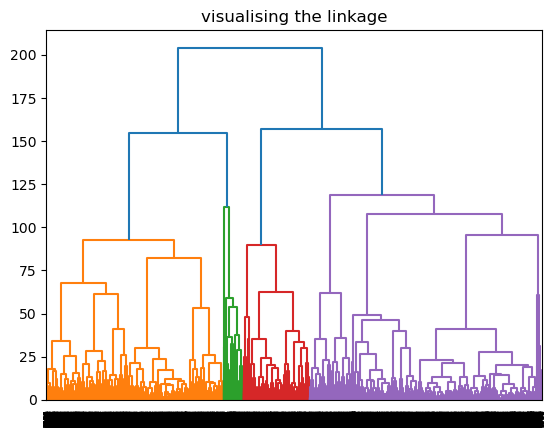

In [98]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the linkage') 
Dendrogram = shc.dendrogram((shc.linkage(scaled_credit_cards, method ='ward'))) 

In [96]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

max_cluster_option = 8

silhouette_scores = []
for n_cluster in range(2, max_cluster_option):
    silhouette_scores.append(silhouette_score(scaled_credit_cards, AgglomerativeClustering(n_clusters=n_cluster).fit_predict(scaled_credit_cards)))

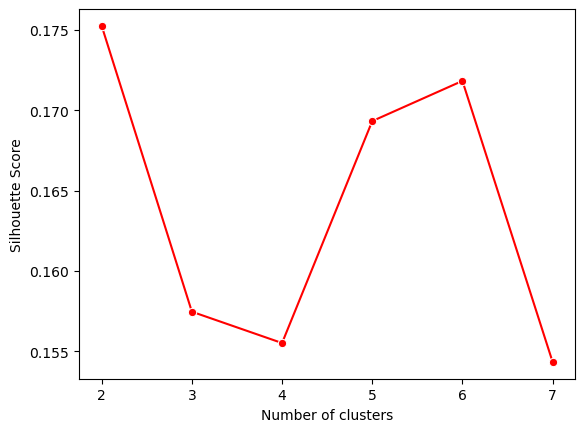

In [97]:
sns.lineplot(x=range(2, max_cluster_option), y=silhouette_scores, marker='o',color='red')
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [99]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(scaled_credit_cards)

AgglomerativeClustering()

In [103]:
hierarchical_profiles = pd.DataFrame(scaler.inverse_transform(scaled_credit_cards), columns=new_credit_cards_df.columns)
hierarchical_profiles['Cluster'] = hierarchical.labels_
hierarchical_profiles.groupby('Cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,1677.802056,0.817193,311.990677,188.828234,123.337787,1355.782900,0.243242,0.080932,0.163115,0.181109,4.347495,4.34898,4016.93261,1425.981436,943.924698,0.090453,11.252505
1,1393.278512,0.968457,2050.310062,1203.857907,846.941486,408.271923,0.864727,0.386562,0.669436,0.065523,1.585558,30.40517,5217.63455,2198.816661,695.189921,0.249566,11.919921


In [104]:
profile_ranges_hc = hierarchical_profiles.groupby('Cluster').agg(['min', 'max']).to_dict()

prev = None
for key in profile_ranges_hc:
    print(key, ':', profile_ranges_hc[key])
    if prev and key[0] == prev:
        print()

    prev = key[0]

('BALANCE', 'min') : {0: 0.0, 1: 0.0}
('BALANCE', 'max') : {0: 16304.88925, 1: 19043.13856}

('BALANCE_FREQUENCY', 'min') : {0: 0.0, 1: 0.0}
('BALANCE_FREQUENCY', 'max') : {0: 1.0, 1: 1.0}

('PURCHASES', 'min') : {0: 0.0, 1: 0.0}
('PURCHASES', 'max') : {0: 7739.48, 1: 49039.57}

('ONEOFF_PURCHASES', 'min') : {0: 0.0, 1: 0.0}
('ONEOFF_PURCHASES', 'max') : {0: 6678.26, 1: 40761.25}

('INSTALLMENTS_PURCHASES', 'min') : {0: 0.0, 1: 0.0}
('INSTALLMENTS_PURCHASES', 'max') : {0: 7739.48, 1: 22500.0}

('CASH_ADVANCE', 'min') : {0: 0.0, 1: 0.0}
('CASH_ADVANCE', 'max') : {0: 47137.21176, 1: 19513.474829999996}

('PURCHASES_FREQUENCY', 'min') : {0: 0.0, 1: 0.0}
('PURCHASES_FREQUENCY', 'max') : {0: 1.0, 1: 1.0}

('ONEOFF_PURCHASES_FREQUENCY', 'min') : {0: 0.0, 1: 0.0}
('ONEOFF_PURCHASES_FREQUENCY', 'max') : {0: 1.0, 1: 1.0}

('PURCHASES_INSTALLMENTS_FREQUENCY', 'min') : {0: 0.0, 1: 0.0}
('PURCHASES_INSTALLMENTS_FREQUENCY', 'max') : {0: 1.0, 1: 1.0}

('CASH_ADVANCE_FREQUENCY', 'min') : {0: 0.0, 1: 

Silhouette Score

In [105]:
warnings.filterwarnings("ignore")

silhouette_score_hc = silhouette_score(scaled_credit_cards, AgglomerativeClustering(n_clusters=2).fit_predict(scaled_credit_cards))
print(silhouette_score_hc)

warnings.resetwarnings()

0.17524707902475337


### DBSCAN

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cluster import DBSCAN

param_grid = {'eps': [1.5, 2.5, 3.5, 4.5], 'min_samples': [3, 5]}

best_score = -1
best_eps = None
best_min_samples = None

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_credit_cards)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            score = silhouette_score(scaled_credit_cards, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

Best eps: 4.5
Best min_samples: 3
Best silhouette score: 0.7114694515108586


In [195]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.5, min_samples=3)
dbscan.fit(scaled_credit_cards)

DBSCAN(eps=4.5, min_samples=3)

In [199]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [201]:
dbscan_profiles = pd.DataFrame(scaler.inverse_transform(scaled_credit_cards), columns=new_credit_cards_df.columns)
dbscan_profiles['Cluster'] = dbscan.labels_
dbscan_profiles.groupby('Cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
-1,6197.758101,0.952711,14335.053333,9365.843492,4969.209841,6126.685581,0.819305,0.562334,0.687704,0.266347,12.666667,99.476190,13749.206349,19763.032351,9046.441923,0.300646,11.650794
0,1530.721632,0.876767,909.192883,530.508109,378.987287,938.023785,0.488247,0.199980,0.362340,0.133783,3.121495,14.116879,4427.218571,1603.365400,786.768110,0.152760,11.517059
1,3446.747277,0.963636,206.582000,164.762000,41.820000,8827.835377,0.180303,0.109091,0.089394,0.893939,111.200000,2.800000,7300.000000,5413.855747,944.324869,0.028571,11.400000


In [202]:
profile_ranges_dbscan = dbscan_profiles.groupby('Cluster').agg(['min', 'max']).to_dict()

prev = None
for key in profile_ranges_dbscan:
    print(key, ':', profile_ranges_dbscan[key])
    if prev and key[0] == prev:
        print()

    prev = key[0]

('BALANCE', 'min') : {-1: 1132.386178, 0: 0.0, 1: 1284.63314}
('BALANCE', 'max') : {-1: 19043.13856, 0: 18495.55855, 1: 7268.70638}

('BALANCE_FREQUENCY', 'min') : {-1: 0.27272700000000005, 0: 0.0, 1: 0.818182}
('BALANCE_FREQUENCY', 'max') : {-1: 1.0, 0: 1.0, 1: 1.0}

('PURCHASES', 'min') : {-1: 0.0, 0: 0.0, 1: 0.0}
('PURCHASES', 'max') : {-1: 49039.57, 0: 15704.04, 1: 670.5}

('ONEOFF_PURCHASES', 'min') : {-1: 0.0, 0: 0.0, 1: 0.0}
('ONEOFF_PURCHASES', 'max') : {-1: 40761.25, 0: 14215.000000000002, 1: 516.9}

('INSTALLMENTS_PURCHASES', 'min') : {-1: 0.0, 0: 0.0, 1: 0.0}
('INSTALLMENTS_PURCHASES', 'max') : {-1: 22500.0, 0: 7787.98, 1: 153.60000000000002}

('CASH_ADVANCE', 'min') : {-1: 0.0, 0: 0.0, 1: 5406.459348}
('CASH_ADVANCE', 'max') : {-1: 47137.21176, 0: 23130.82106, 1: 12702.4277}

('PURCHASES_FREQUENCY', 'min') : {-1: 0.0, 0: 0.0, 1: 0.0}
('PURCHASES_FREQUENCY', 'max') : {-1: 1.0, 0: 1.0, 1: 0.545455}

('ONEOFF_PURCHASES_FREQUENCY', 'min') : {-1: 0.0, 0: 0.0, 1: 0.0}
('ONEOFF_PU

Silhouette Score

In [200]:
warnings.filterwarnings("ignore")

silhouette_score_dbscan = silhouette_score(scaled_credit_cards, DBSCAN(eps=4.5, min_samples=3).fit_predict(scaled_credit_cards))
print(silhouette_score_dbscan)

warnings.resetwarnings()

0.7114694515108586
